<a href="https://colab.research.google.com/github/ssgupta201301/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
#Our goal is to reproduce this table which holds the first two orders for user id 1.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [56]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-23 00:01:46--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.205.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.205.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  78.8MB/s    in 2.5s    

2020-01-23 00:01:49 (78.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [57]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [58]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [59]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
import pandas as pd


In [0]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [60]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [62]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [63]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
#orders
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [61]:
#products
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
#Concatenate order_products__prior and order_products__train
#checking the shape of order_products__prior
order_products__prior.shape

(32434489, 4)

In [0]:
#checking the shape of order_products__train
order_products__train.shape

(1384617, 4)

In [64]:
order_products = pd.concat([order_products__prior, order_products__train])

print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
#Before we can continue we need to understand where the data in the above table
# is coming from and what why specific pieces of data are held in the specific dataframes.

In [0]:
##The Orders Dataframe
#Holds information about specific orders, things like who placed the order, what
#user_id,order_id,order_number,order_dow,order_hour_of_day
##The Order_Products Dataframe
#order_id,product_id,add_to_cart_order

#First Merge
#Combine orders and order_products

In [0]:
#but first lets slim down our dataframes to only the information that we need
### Create a condition
condition = (orders['order_id'] <= 5)
orders_subset = orders[condition]

### Look at the subsetted dataframe
orders_subset.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [0]:
# creating a subset by passing a condition
condition = ((orders['user_id'] == 1) & (orders['order_number'] <= 2))

orders_subset = orders[condition]

print(orders_subset.shape)
orders_subset.head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
#Remember there are multiple ways that we could have filtered this dataframe. 
#We also could have done it by specific order_ids
orders_subset = orders[((orders['order_id'] == 2539329) | (orders['order_id'] == 2398795))]

print(orders_subset.shape)
orders_subset.head(15)

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
#Now we’ll filter down the order_products dataframe
#using bitwise operator here | for or
order_products_subset = order_products[((order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795))]

print(order_products_subset.shape)
order_products_subset.head(11)

(11, 4)


,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0


In [0]:
# merging  two tables orders_subset, order_products_subset together.
orders_and_products = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')

orders_and_products.head(11)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [0]:
# Remove columns that we don't need
orders_and_products = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')

orders_and_products.head(11)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [0]:
#we’re missing one more column product_name 
#merge orders_and_products with products
#Use product_id as our identifier in both tables
orders_and_products['product_id']

0       196
1     14084
2     12427
3     26088
4     26405
5       196
6     10258
7     12427
8     13176
9     26088
10    13032
Name: product_id, dtype: int64

In [0]:
orders_and_products['product_id'].isin([196, 26088])

0      True
1     False
2     False
3      True
4     False
5      True
6     False
7     False
8     False
9      True
10    False
Name: product_id, dtype: bool

In [0]:
#creating another subset passing a condition
condition = products['product_id'].isin(orders_and_products['product_id'])

products_subset = products[condition]

products_subset

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [0]:
#meriging two datasets
final = pd.merge(orders_and_products, products_subset, on='product_id', how='inner')

final

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
3,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19
4,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19
5,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19
6,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19
7,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17
8,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19
9,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4


In [0]:
final = final.drop(['aisle_id', 'department_id'], axis=1)
final

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky
4,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky
5,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn
6,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn
7,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls
8,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios
9,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas


In [0]:
display(example)

In [0]:
### sort rows
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky
5,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn
7,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda
8,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios
4,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky
9,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas
6,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn


In [0]:
### reorder columns
final = final[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name']]

In [0]:
### remove underscores from column headers
final.columns = [column.replace('_', ' ') for column in final]
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
#products,order_products__train,order_products__prior
#df[‘product_id’].value_counts()

order_products = pd.concat([order_products__prior, order_products__train])

print(order_products.shape)
order_products.head()


(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
product_new = products.drop(columns=['aisle_id','department_id'])
product_new.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [0]:
#merge orders_products and product_new
df_orders_products = pd.merge(order_products,product_new,on='product_id',how='inner')

In [0]:
df_orders_products.head()
#df_orders_products.groupby(['product_name'])['order_id'].count()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1,1,Organic Egg Whites
1,26,33120,5,0,Organic Egg Whites
2,120,33120,13,0,Organic Egg Whites
3,327,33120,5,1,Organic Egg Whites
4,390,33120,28,1,Organic Egg Whites


In [0]:
#Filtering the data for top 10 products
#https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
df_order_products_10 = df_orders_products[df_orders_products['product_name'].isin(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',  'Organic Baby Spinach', 'Organic Hass Avocado',
                  'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk'])]

In [0]:
df_order_products_10.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
262494,3,21903,4,1,Organic Baby Spinach
262495,26,21903,6,0,Organic Baby Spinach
262496,31,21903,3,1,Organic Baby Spinach
262497,39,21903,4,0,Organic Baby Spinach
262498,56,21903,8,1,Organic Baby Spinach


In [0]:
#counts of the top 10 most frequently ordered products
df_order_products_10.groupby(['product_name'])['product_id'].count()

product_name
Bag of Organic Bananas    394930
Banana                    491291
Large Lemon               160792
Limes                     146660
Organic Avocado           184224
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Strawberries      275577
Organic Whole Milk        142813
Strawberries              149445
Name: product_id, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
#we “concatenate” two dataframes we will “stick them together” either by rows or columns
import pandas as pd

In [0]:
df1 = pd.DataFrame({'a': [1,2,3,4], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df2 = pd.DataFrame({'a': [6,4,8,7], 'b': [9,4,3,2], 'c': [1,6,2,9]})

In [0]:
df1.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [0]:
df2.head()

,a,b,c
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [0]:
#concatenating by rows
#when concatenating two dataframes pass them as lists
concatenated_by_rows = pd.concat([df1,df2])
concatenated_by_rows.head(8)


,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [0]:
# reset the index to avoid having repeated row identifiers
concatenated_by_rows.reset_index()
concatenated_by_rows.head(8)

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [0]:
#Concatenate by Columns
#wecan also write axis=columns
concatenated_by_columns = pd.concat([df1,df2], axis=1)

concatenated_by_columns.head()


,a,b,c,a,b,c
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


In [0]:

df3 = pd.DataFrame({'a': [4,3,2,1], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df4 = pd.DataFrame({'a': [6,4,8,7,8], 'b': [9,4,3,2,1], 'd': [1,6,2,9,5]})


In [0]:
df3.head()

,a,b,c
0,4,4,7
1,3,5,8
2,2,6,9
3,1,7,10


In [0]:
df4.head()

,a,b,d
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9
4,8,1,5


In [0]:
#Concatenate by rows when not all column headers match
#If column headers and row index values do not match  up, 
#then NaN values will be added where matches can’t be found.
concatenated_by_rows = pd.concat([df3,df4], sort=True)

concatenated_by_rows.head(9)

,a,b,c,d
0,4,4,7.0,NaN
1,3,5,8.0,NaN
2,2,6,9.0,NaN
3,1,7,10.0,NaN
0,6,9,NaN,1.0
1,4,4,NaN,6.0
2,8,3,NaN,2.0
3,7,2,NaN,9.0
4,8,1,NaN,5.0


In [0]:
#Concatenate by columns when not all row indexes match
#Whenever we are combining dataframes, if appropriate values cannot be found 
#based on the rules of the method we are using, then missing values will be 
#filled with NaNs
concatenated_by_columns = pd.concat([df3,df4], axis=1)

concatenated_by_columns.head()

,a,b,c,a,b,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


Reshape Data Section
Replicate the lesson code. Remember, if you haven't followed along typing out
what we did during lecture, do that now to get more repetition with the syntax.
Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
Table 2 --> Tidy
Tidy --> Table 2
Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.





In [0]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
table2.unstack()

John Smith    treatmenta     NaN
              treatmentb     2.0
Jane Doe      treatmenta    16.0
              treatmentb    11.0
Mary Johnson  treatmenta     3.0
              treatmentb     1.0
dtype: float64

In [0]:
tidytable = table2.unstack().reset_index() 
tidytable

,level_0,level_1,0
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# Finally got the tidy table done
tidytable_rename = tidytable.rename(columns={'level_0': 'name', 'level_1': 'trt', 0: 'result'})
tidytable_rename.head()

,name,trt,result
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0


In [0]:
#using .pivot_table
new_t = tidytable_rename.pivot_table(index='trt', columns='name', values='result')
new_t


name,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [0]:
new_t = new_t.reset_index()
new_t

name,trt,Jane Doe,John Smith,Mary Johnson
0,treatmenta,16.0,NaN,3.0
1,treatmentb,11.0,2.0,1.0


In [0]:
#TODO: Check why this is not working
#Drop the name column
new_t2 = new_t.drop(columns=['name'])
new_t2


KeyError: ignored

In [0]:
#reorder the columns as per specification
new_t2 = new_t2[['trt', 'John Smith', 'Jane Doe', 'Mary Johnson']]
new_t2

name,trt,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
#rename the columns as per specification 
#as asked finally converted the tidy table to wide table
new_t2.rename(columns={"name": "", "trt": "" })

name,,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
#table is for reference, this is the specification I need to achieve
table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
import pandas as pd
import seaborn as sns
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [0]:
#create a pivot table showing the number of passengers by month and year. 
#Use year for the index and month for the columns. You've done it right if you 
#get 112 passengers for January 1949 and 432 passengers for December 1960.
# Flights Pivot Table
flights_passengers= pd.pivot_table(flights,index='year',columns='month')
flights_passengers

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

In [0]:
#orders placed afternoon
orders_latest = orders[orders.order_hour_of_day>=12]
orders_latest


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2,473747,1,prior,3,3,12,21.0
4,431534,1,prior,5,4,15,28.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
17,3194192,2,prior,7,2,12,14.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [0]:
order_products_latest=orders_latest.merge(order_products, how='inner', on='order_id')
order_products_latest

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,473747,1,prior,3,3,12,21.0,196,1,1
1,473747,1,prior,3,3,12,21.0,12427,2,1
2,473747,1,prior,3,3,12,21.0,10258,3,1
3,473747,1,prior,3,3,12,21.0,25133,4,0
4,473747,1,prior,3,3,12,21.0,30450,5,0
...,...,...,...,...,...,...,...,...,...,...
21899201,272231,206209,train,14,6,14,30.0,40603,4,0
21899202,272231,206209,train,14,6,14,30.0,15655,5,0
21899203,272231,206209,train,14,6,14,30.0,42606,6,0
21899204,272231,206209,train,14,6,14,30.0,37966,7,0


In [0]:
order_products_latest=order_products_latest.merge(products, how='inner', on='product_id')
order_products_latest.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
1,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7
2,3108588,1,prior,8,1,14,14.0,196,2,1,Soda,77,7
3,2295261,1,prior,9,1,16,0.0,196,4,1,Soda,77,7
4,1870022,15,prior,17,2,16,8.0,196,6,1,Soda,77,7


In [0]:

top_25 = order_products_latest[order_products_latest['product_name'].isin(['Half Baked Frozen Yogurt', 'The Tonight Dough Ice Cream', 'Americone Dream Ice Cream',  'Half Baked Ice Cream', 'Phish Food Ice Cream',
                  'Milk and Cookies Ice Cream', 'Sicilian Pistachio', 'Chocolate Peanut Butter Cup Gelato', 'Birthday Cake Light Ice Cream', 'Cherry Garcia Ice Cream','Strawberry Ice Cream', 'Vanilla Bean Light Ice Cream',
                     'Coffee Ice Cream', 'Roman Raspberry Sorbetto', 'Mediterraneon Mint Gelato', 'Caramel Cookie Crunch Gelato','Chocolate Chip Cookie Dough Ice Cream',
                     'Mint Chip','Coconut Almond Minis Frozen Dessert Bars','Mint Chocolate Chip Ice Cream','Chocolate Peanut Butter Ice Cream',
                     'Vanilla Milk Chocolate Almond Ice Cream Bars','Sea Salt Caramel Gelato','Vanilla Bean Ice Cream','Rising Crust Pepperoni Pizza'])]

In [0]:
top_25.head(25)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1913558,3225766,3,prior,8,0,17,7.0,48523,8,0,Birthday Cake Light Ice Cream,37,1
1913559,3160850,3,prior,9,0,16,7.0,48523,5,1,Birthday Cake Light Ice Cream,37,1
1913560,3276030,80,prior,7,5,12,12.0,48523,14,0,Birthday Cake Light Ice Cream,37,1
1913561,2434894,80,prior,10,1,15,6.0,48523,9,1,Birthday Cake Light Ice Cream,37,1
1913562,1179928,235,train,22,5,13,5.0,48523,3,0,Birthday Cake Light Ice Cream,37,1
1913563,3342293,236,prior,28,5,23,2.0,48523,4,0,Birthday Cake Light Ice Cream,37,1
1913564,3206736,297,prior,8,1,18,30.0,48523,2,0,Birthday Cake Light Ice Cream,37,1
1913565,2134343,362,prior,9,5,17,3.0,48523,12,0,Birthday Cake Light Ice Cream,37,1
1913566,369476,434,prior,1,4,14,NaN,48523,3,0,Birthday Cake Light Ice Cream,37,1
1913567,646320,452,prior,16,0,22,13.0,48523,15,0,Birthday Cake Light Ice Cream,37,1


In [0]:
#stretch goal 1
# the count of top 25 orders at the evening
top_25.groupby(['product_name'])['order_hour_of_day'].count()

product_name
Birthday Cake Light Ice Cream                   4057
Caramel Cookie Crunch Gelato                    4275
Cherry Garcia Ice Cream                         3383
Chocolate Chip Cookie Dough Ice Cream           6304
Chocolate Peanut Butter Cup Gelato              3433
Chocolate Peanut Butter Ice Cream               2649
Coconut Almond Minis Frozen Dessert Bars        2525
Coffee Ice Cream                                2921
Half Baked Frozen Yogurt                        2264
Milk and Cookies Ice Cream                      3906
Mint Chip                                       4340
Mint Chocolate Chip Ice Cream                   2622
Phish Food Ice Cream                               6
Rising Crust Pepperoni Pizza                    2800
Roman Raspberry Sorbetto                        2348
Sea Salt Caramel Gelato                         5002
Sicilian Pistachio                              2348
Strawberry Ice Cream                            4782
Vanilla Bean Ice Cream           

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
table = pd.crosstab(top_25['order_hour_of_day'], 
                    top_25['product_name'], 
                    normalize=True)

table

product_name,Birthday Cake Light Ice Cream,Caramel Cookie Crunch Gelato,Cherry Garcia Ice Cream,Chocolate Chip Cookie Dough Ice Cream,Chocolate Peanut Butter Cup Gelato,Chocolate Peanut Butter Ice Cream,Coconut Almond Minis Frozen Dessert Bars,Coffee Ice Cream,Half Baked Frozen Yogurt,Milk and Cookies Ice Cream,Mint Chip,Mint Chocolate Chip Ice Cream,Phish Food Ice Cream,Rising Crust Pepperoni Pizza,Roman Raspberry Sorbetto,Sea Salt Caramel Gelato,Sicilian Pistachio,Strawberry Ice Cream,Vanilla Bean Ice Cream,Vanilla Bean Light Ice Cream,Vanilla Milk Chocolate Almond Ice Cream Bars
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
12,0.006142,0.006142,0.005173,0.009477,0.005258,0.003491,0.003306,0.004247,0.002765,0.005572,0.005985,0.003605,0.000014,0.004745,0.003335,0.007724,0.003591,0.007211,0.004674,0.005330,0.004717
13,0.005957,0.006584,0.005344,0.009776,0.005372,0.003791,0.004346,0.004446,0.003349,0.005472,0.006983,0.004418,0.000014,0.004560,0.003962,0.007866,0.003092,0.007738,0.005615,0.005843,0.004802
14,0.006641,0.007325,0.005230,0.010332,0.006085,0.004175,0.004190,0.004361,0.003591,0.005771,0.007368,0.004389,0.000014,0.004631,0.003819,0.007852,0.003520,0.008223,0.006185,0.006299,0.005016
15,0.007211,0.008337,0.005743,0.011087,0.006085,0.004831,0.004375,0.005159,0.004047,0.006769,0.008308,0.004745,0.000014,0.004446,0.004004,0.009320,0.004361,0.007980,0.006085,0.006541,0.005415
16,0.006555,0.007752,0.005957,0.011187,0.006455,0.004674,0.004988,0.005501,0.003919,0.007211,0.007653,0.004902,0.000000,0.005301,0.004147,0.008821,0.004745,0.008422,0.005743,0.006128,0.005458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.005073,0.004361,0.003876,0.006940,0.004232,0.003249,0.002893,0.003563,0.002822,0.004646,0.005258,0.003164,0.000000,0.003107,0.002423,0.005372,0.003007,0.005330,0.003620,0.004574,0.003819
20,0.003192,0.003491,0.002836,0.005102,0.002380,0.002337,0.001895,0.002494,0.002095,0.003021,0.003221,0.001796,0.000014,0.001781,0.001838,0.003662,0.001724,0.003762,0.002309,0.003064,0.002765
21,0.001853,0.001853,0.001639,0.002779,0.001354,0.001439,0.001169,0.001354,0.001226,0.001810,0.001924,0.001211,0.000000,0.000784,0.001226,0.002351,0.001140,0.002138,0.001610,0.001568,0.001169


In [0]:
table = pd.crosstab(top_25['order_hour_of_day'], 
                    top_25['product_name'], 
                    normalize=True)

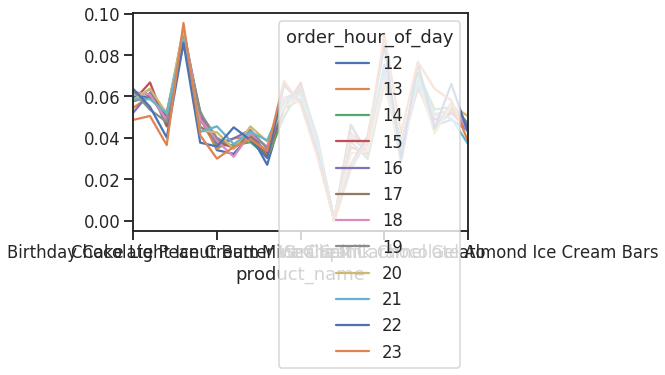

In [50]:
#Stretch goal 2
# not an elegant plot..but well this is my first attempt
# to do: learn more about plotting crosstabs of a huge data
pd.crosstab(top_25['product_name'], 
            top_25['order_hour_of_day'],normalize='columns').plot();

In [38]:
## creating a subset with top 2 products because colab is crashing repeatedly due to huge dataset
product_names=['Birthday Cake Light Ice Cream','Caramel Cookie Crunch Gelato']
condition = top_25['product_name'].isin(product_names)
subset= top_25[condition]
print(subset.shape)
subset.head(30)

(8332, 13)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1913558,3225766,3,prior,8,0,17,7.0,48523,8,0,Birthday Cake Light Ice Cream,37,1
1913559,3160850,3,prior,9,0,16,7.0,48523,5,1,Birthday Cake Light Ice Cream,37,1
1913560,3276030,80,prior,7,5,12,12.0,48523,14,0,Birthday Cake Light Ice Cream,37,1
1913561,2434894,80,prior,10,1,15,6.0,48523,9,1,Birthday Cake Light Ice Cream,37,1
1913562,1179928,235,train,22,5,13,5.0,48523,3,0,Birthday Cake Light Ice Cream,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913583,2705713,1229,train,4,0,14,30.0,48523,1,0,Birthday Cake Light Ice Cream,37,1
1913584,2741368,1250,prior,36,2,17,6.0,48523,5,0,Birthday Cake Light Ice Cream,37,1
1913585,1079773,1250,prior,37,3,14,1.0,48523,1,1,Birthday Cake Light Ice Cream,37,1
1913586,1098901,1250,prior,38,5,12,2.0,48523,7,1,Birthday Cake Light Ice Cream,37,1


In [39]:
subset.drop(columns=['user_id','eval_set','order_dow', 'days_since_prior_order','add_to_cart_order','aisle_id','department_id','order_number','reordered'])

,order_id,order_hour_of_day,product_id,product_name
1913558,3225766,17,48523,Birthday Cake Light Ice Cream
1913559,3160850,16,48523,Birthday Cake Light Ice Cream
1913560,3276030,12,48523,Birthday Cake Light Ice Cream
1913561,2434894,15,48523,Birthday Cake Light Ice Cream
1913562,1179928,13,48523,Birthday Cake Light Ice Cream
...,...,...,...,...
9130508,867837,16,13885,Caramel Cookie Crunch Gelato
9130509,2586952,13,13885,Caramel Cookie Crunch Gelato
9130510,2187225,13,13885,Caramel Cookie Crunch Gelato
9130511,983631,15,13885,Caramel Cookie Crunch Gelato


In [40]:
subset[['product_id','product_name','order_id','order_hour_of_day']]

,product_id,product_name,order_id,order_hour_of_day
1913558,48523,Birthday Cake Light Ice Cream,3225766,17
1913559,48523,Birthday Cake Light Ice Cream,3160850,16
1913560,48523,Birthday Cake Light Ice Cream,3276030,12
1913561,48523,Birthday Cake Light Ice Cream,2434894,15
1913562,48523,Birthday Cake Light Ice Cream,1179928,13
...,...,...,...,...
9130508,13885,Caramel Cookie Crunch Gelato,867837,16
9130509,13885,Caramel Cookie Crunch Gelato,2586952,13
9130510,13885,Caramel Cookie Crunch Gelato,2187225,13
9130511,13885,Caramel Cookie Crunch Gelato,983631,15


In [41]:
pd.crosstab(subset['order_hour_of_day'],subset['product_name'])

product_name,Birthday Cake Light Ice Cream,Caramel Cookie Crunch Gelato
order_hour_of_day,,
12,431,431
13,418,462
14,466,514
15,506,585
16,460,544
...,...,...
19,356,306
20,224,245
21,130,130


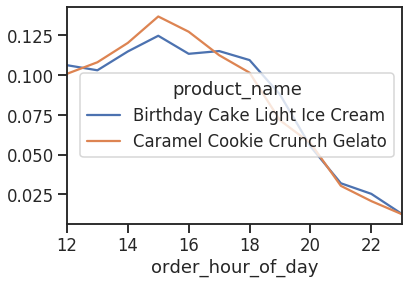

In [42]:

pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], 
            normalize='columns').plot();

In [51]:
table = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

table

product_name,Birthday Cake Light Ice Cream,Caramel Cookie Crunch Gelato
order_hour_of_day,,
12,0.051728,0.051728
13,0.050168,0.055449
14,0.055929,0.061690
15,0.060730,0.070211
16,0.055209,0.065290
...,...,...
19,0.042727,0.036726
20,0.026884,0.029405
21,0.015602,0.015602


In [53]:
melt1 = table.reset_index().melt(id_vars='order_hour_of_day')
melt1

,order_hour_of_day,product_name,value
0,12,Birthday Cake Light Ice Cream,0.051728
1,13,Birthday Cake Light Ice Cream,0.050168
2,14,Birthday Cake Light Ice Cream,0.055929
3,15,Birthday Cake Light Ice Cream,0.060730
4,16,Birthday Cake Light Ice Cream,0.055209
...,...,...,...
19,19,Caramel Cookie Crunch Gelato,0.036726
20,20,Caramel Cookie Crunch Gelato,0.029405
21,21,Caramel Cookie Crunch Gelato,0.015602
22,22,Caramel Cookie Crunch Gelato,0.010682


In [55]:
#Stretch goal 3 completed
melt1=melt1.rename(columns={'order_hour_of_day': 'Hour of Day Ordered','product_name': 'Product', 
     'value': 'Percent of Orders by Product'})
melt1

,Hour of Day Ordered,Product,Percent of Orders by Product
0,12,Birthday Cake Light Ice Cream,0.051728
1,13,Birthday Cake Light Ice Cream,0.050168
2,14,Birthday Cake Light Ice Cream,0.055929
3,15,Birthday Cake Light Ice Cream,0.060730
4,16,Birthday Cake Light Ice Cream,0.055209
...,...,...,...
19,19,Caramel Cookie Crunch Gelato,0.036726
20,20,Caramel Cookie Crunch Gelato,0.029405
21,21,Caramel Cookie Crunch Gelato,0.015602
22,22,Caramel Cookie Crunch Gelato,0.010682


In [0]:
#Modern Pandas, Part 5: Tidy Data
#could not figure this out at all
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')

In [0]:

games = pd.read_csv("data/nba.csv")
games.head()

FileNotFoundError: ignored

In [0]:
# Just practicing

In [0]:
# chain merging
merge1 = departments[['department_id','department']].merge(products[['department_id','product_name']])

In [0]:
# group by
